# **Data Mining Mini Project On Housing Prices Prediction**

**By - BlueSaiyanCodes**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
data_path = "housing.csv"
df = pd.read_csv(data_path)

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

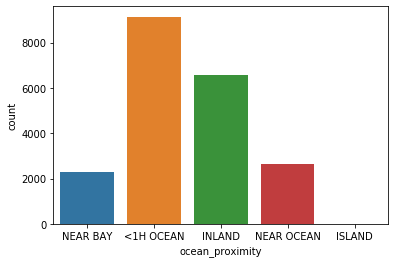

In [7]:
sns.countplot(df.ocean_proximity)

In [8]:
new_val = pd.get_dummies(df.ocean_proximity)

In [9]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [10]:
df[new_val.columns] = new_val

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df.columns
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [13]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [14]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [15]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006463,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


Text(0.5, 1.0, 'Correlation coefficients WRT house value')

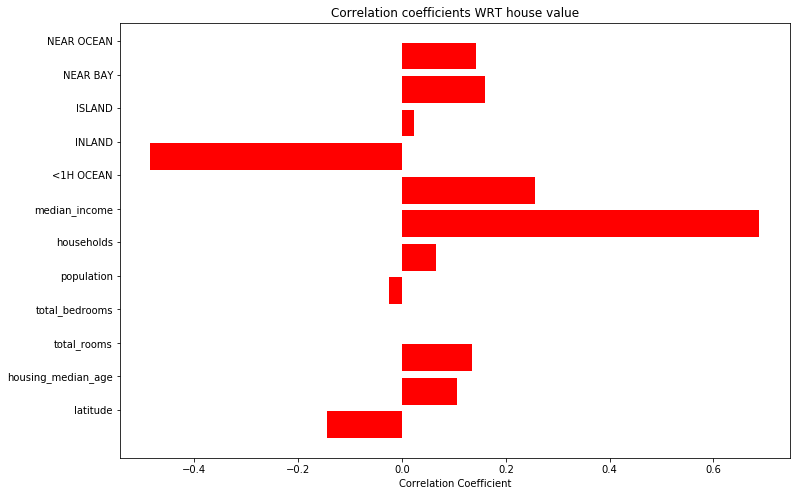

In [16]:
num_feat = df.columns[df.dtypes != object]
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.median_house_value)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fif, ax = plt.subplots(figsize=(12, 8))
rects = ax.barh(ind, np.array(values), color = 'red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation = 'horizontal')
ax.set_xlabel("Correlation Coefficient")
ax.set_title("Correlation coefficients WRT house value")

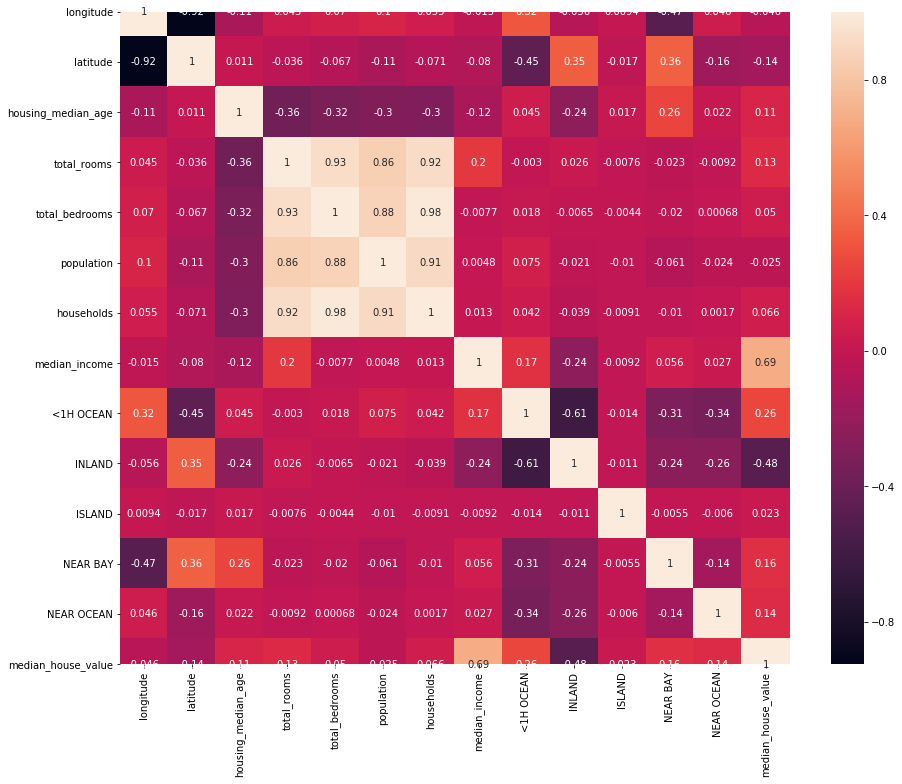

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [18]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E6A91377C8>,
      dtype=object)

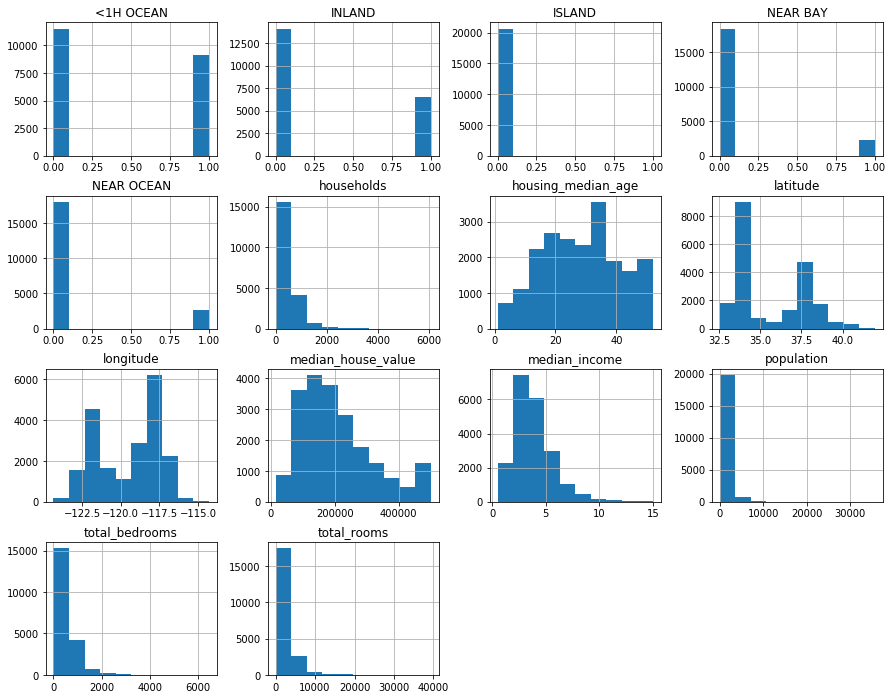

In [19]:
df.hist(figsize=(15,12))

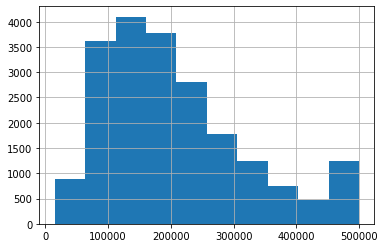

In [20]:
df.median_house_value.hist()

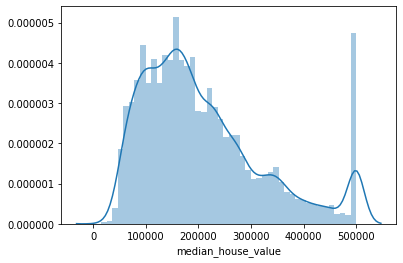

In [21]:
sns.distplot(df.median_house_value)

**Data Cleaning**

In [22]:
df.isna().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
median_house_value      0
dtype: int64

In [23]:
df = df.fillna(df.mean())

In [24]:
df.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

**Data Scaling**

In [25]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler() 

In [26]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [27]:
feature = df.drop(['median_house_value'], axis=1)
label = df.median_house_value

In [28]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(df.median_house_value.values.reshape(-1,1)).flatten() 

In [29]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [30]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

**Split the data into train and test**

In [31]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)                                   

**ML Model - Linear Regression**

In [32]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)

r2_score(linear_reg.predict(feature_train),label_train)*100

45.70357093275336

**Cross Validation Score**

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(linear_reg, feature_train,label_train, cv=10) 

array([0.68330103, 0.62143098, 0.63597643, 0.64036629, 0.63004886,
       0.64013318, 0.63399809, 0.65858277, 0.6608547 , 0.66008548])

In [35]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test) * 100

In [36]:
reg_score

44.099107231638314

In [37]:
linear_reg.coef_

array([-0.45964271, -0.46958263,  0.11238544, -0.07755593,  0.26022529,
       -0.4407318 ,  0.29275384,  0.63242516,  0.05426747, -0.1105879 ,
        0.02476957,  0.02563709,  0.04801414])

In [38]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
median_income,0.632425
households,0.292754
total_bedrooms,0.260225
housing_median_age,0.112385
<1H OCEAN,0.054267
NEAR OCEAN,0.048014
NEAR BAY,0.025637
ISLAND,0.024770
total_rooms,-0.077556
INLAND,-0.110588


In [39]:
df.corr().median_house_value.sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

****RANSAC Regression****

In [40]:
ransac_reg = linear_model.RANSACRegressor()

In [41]:
ransac_reg.fit(feature_train,label_train)
r2_score(ransac_reg.predict(feature_train),label_train)*100

24.517158105223768

In [42]:
ransac_score = r2_score(ransac_reg.predict(feature_test),label_test) * 100

In [43]:
ransac_score

22.87997082736052

In [44]:
# Ransac regrssor is performing way poorly than Linear Regresson

**Ridge Regressor**

In [45]:
ridge_reg = linear_model.Ridge(random_state=19) 
ridge_reg.fit(feature_train,label_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=19, solver='auto', tol=0.001)

In [46]:
r2_score(ridge_reg.predict(feature_train),label_train) * 100

45.69123936205788

In [47]:
ridge_score = r2_score(ridge_reg.predict(feature_test),label_test) * 100

In [48]:
ridge_score

44.08622970359946

In [49]:
ridge_reg.coef_

array([-0.45868985, -0.46857275,  0.11239848, -0.07739211,  0.26004841,
       -0.44045521,  0.29252023,  0.63237809,  0.05434228, -0.11080434,
        0.02477619,  0.02572536,  0.04812089])

In [50]:
pd.DataFrame(ridge_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient') 

,Coefficient
median_income,0.632378
households,0.292520
total_bedrooms,0.260048
housing_median_age,0.112398
<1H OCEAN,0.054342
NEAR OCEAN,0.048121
NEAR BAY,0.025725
ISLAND,0.024776
total_rooms,-0.077392
INLAND,-0.110804


**Decision Tree Regressor**

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
r2_score(tree_reg.predict(feature_train),label_train) * 100

99.99999999999567

In [53]:
# 99% seems like overfitting. Let's cross validate it.

cross_val_score(tree_reg, feature_train, label_train, cv=10)


array([0.66295203, 0.65066055, 0.59331253, 0.63831983, 0.65290616,
       0.6314803 , 0.67121312, 0.6369587 , 0.62634111, 0.6545624 ])

In [54]:
tree_score = r2_score(tree_reg.predict(feature_test),label_test) * 100
tree_score0

63.125704388070744

**Random Forest Regressor**

In [55]:
.from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [56]:
forest_reg.fit(feature_train,label_train)

C:\Users\Blue\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
r2_score(forest_reg.predict(feature_train),label_train) * 100

95.99874556503299

In [58]:
cross_val_score(forest_reg, feature_train, label_train, cv=10)

array([0.81269881, 0.79062919, 0.78608247, 0.78843002, 0.81630304,
       0.78258759, 0.80188089, 0.79940227, 0.78346097, 0.81354185])

In [59]:
# let's see how well the random forest regressor fits well with the test data
forest_score = r2_score(forest_reg.predict(feature_test),label_test) * 100

In [60]:
forest_score

75.87241330885932

In [61]:
data = [reg_score, ransac_score, ridge_score, tree_score, forest_score]
index = ['Linear Regression', 'Ransac Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,75.872413
Decision Tree Regressor,63.125704
Linear Regression,44.099107
Ridge Regression,44.086230
Ransac Regression,22.879971


*the random forest regressor is winner here out of all the ML Algorithm*